# Communicate Data Findings: Ford GoBike System Data

## Investigation Overview

In this investigation, I wanted to look at different relationships and that what features affects the trip duration.

## Dataset Overview

In this dataset, there are 11070 bikes in this dataset with 2,506,983 rows and 11 features (duration, start_time, end_time, start_station_id, start_station_name,end_station_id, end_station_name, user_type, bike_share_for_all_trip , rental_access_method).


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import os
sb.set(style="darkgrid")

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics

curDir = os.getcwd()
path = './Dataset/'
all_files = os.listdir(path)
files = []
for text_file in all_files:    
    filename = path+text_file    
    df = pd.read_csv(filename)
    files.append(df)
df_bike = pd.concat(files) 

df_bike_copy =  df_bike.copy()   
print(df_bike_copy.shape)
df_bike_copy

e:\python3.7.4\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
e:\python3.7.4\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
e:\python3.7.4\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2506983, 15)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150097,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
150098,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
150099,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
150100,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app


In [3]:
df_bike_copy.reset_index(drop=True,inplace=True)
# Removing unnecessary columns
df_bike_copy.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1,inplace=True)

##  Trends about average trip times.

Duration in the dataset take on a very large range of values so, plotted it on a logarithmic scale to get better distribution.

In [10]:
df_bike_copy['duration_min']=df_bike_copy['duration_sec']/60
bins = 10**np.arange(0, df_bike_copy['duration_min'].max() + 0.1 , 0.1);
ticks =  [ 0.3 , 1 , 3, 10, 30, 100, 300];
labels = ['{}'.format(v) for v in ticks];
df_bike_copy['duration_min']=df_bike_copy['duration_min'].astype(int)

e:\python3.7.4\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6692: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


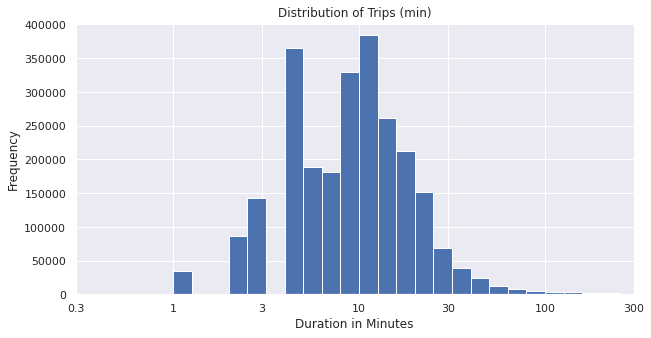

In [0]:
plt.figure(figsize=[10,5]);
plt.hist(data = df_bike_copy , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.title('Distribution of Trips (min)');
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency');

##  Monthly trends

By plotting the number of riders according to a month (left plot) we found out that the number of riders decreases in winter season and it is the highest in the month of "July" when we have summer holidays. But if instead of the number of rides we look at the duration of ride (right plot) then "September" is the winner and apart from it, it follows the same trend as compared with the plot on left side.

In [8]:
df_bike_copy['start_time']=pd.to_datetime(df_bike_copy['start_time'])
df_bike_copy['month']=pd.DatetimeIndex(df_bike_copy['start_time']).month 

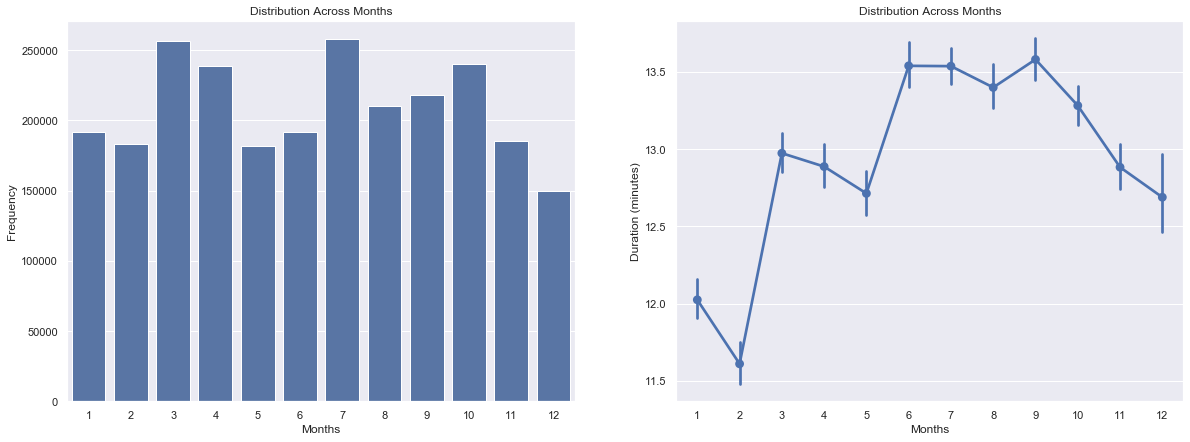

In [12]:
plt.figure(figsize=[20,7]);
plt.subplot(1,2,1)
base_color=sb.color_palette()[0]
sb.countplot(data = df_bike_copy , x = 'month',color=base_color);
plt.title('Distribution Across Months');
plt.xlabel('Months');
plt.ylabel('Frequency');

plt.subplot(1,2,2)
base_color=sb.color_palette()[0]
sb.pointplot(data = df_bike_copy , x = 'month',y='duration_min',color=base_color);
plt.title('Distribution Across Months');
plt.xlabel('Months');
plt.ylabel('Duration (minutes)');

## Trends between different type of users

If we plot a histogram based on the occurence of each type then there is a huge difference between occurence of subscriber user type and user of customer type but if we plot the relation between different type of users about the duration in different months of a year, we can see strange behaviour that duration taken by customer are far more then the subscribers and the reason for that might be the subscribers use the system mainly for commute purposes and the customers don't usually use it but when they do they go to a long drive.

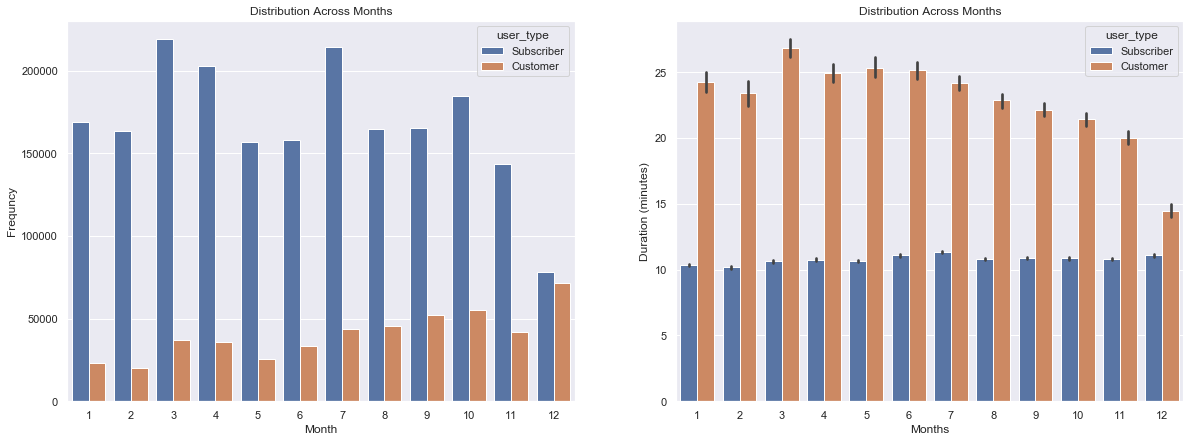

In [15]:
plt.figure(figsize=[20,7]);
plt.subplot(1,2,1)
sb.countplot(data = df_bike_copy ,x='month',hue='user_type');
plt.title('Distribution Across Months');
plt.xlabel('Month');
plt.ylabel('Frequncy');

plt.subplot(1,2,2)
sb.barplot(data = df_bike_copy , x = 'month',y='duration_min',hue='user_type');
plt.title('Distribution Across Months');
plt.xlabel('Months');
plt.ylabel('Duration (minutes)');

## Station Popularity

By plotting, I found out that the most popular start station is the "Market St at 10th St" and the least popular start station is "SF Test Station". and the most popular endation is the "San Francisco Caltrain Station 2" and the least popular end station is "Emeryville Depot".

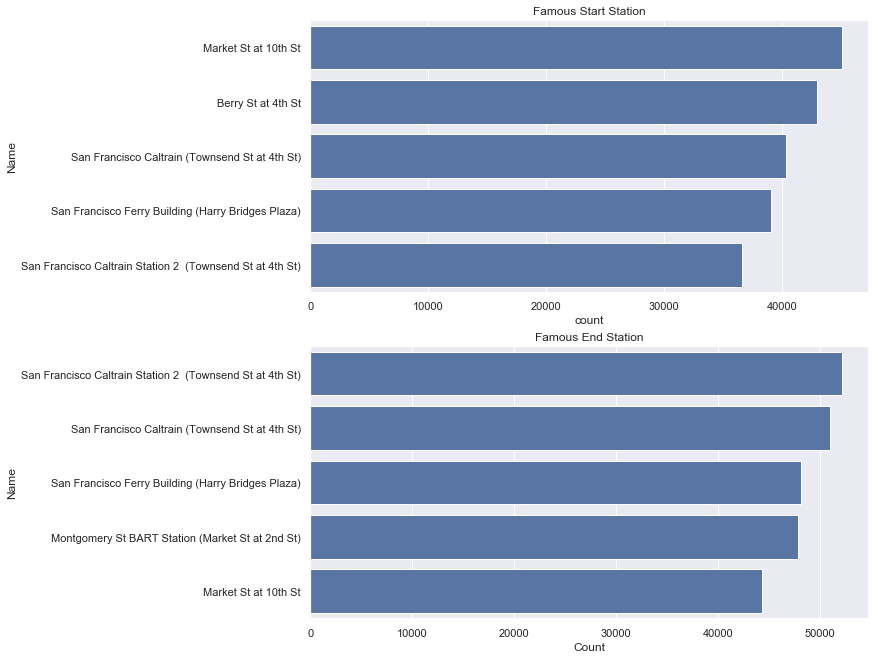

In [39]:
plt.figure(figsize=[10,11]);
plt.subplot(2,1,1)
sb.countplot(data = df_bike_copy ,y='start_station_name',order=df_bike_copy.start_station_name.value_counts().iloc[0:5].index
             ,color=base_color);
plt.title('Famous Start Station');
plt.ylabel('Name');

plt.subplot(2,1,2)
sb.countplot(data = df_bike_copy ,y='end_station_name',order=df_bike_copy.end_station_name.value_counts().iloc[0:5].index
             ,color=base_color);
plt.title('Famous End Station');
plt.ylabel('Name');
plt.xlabel('Count');

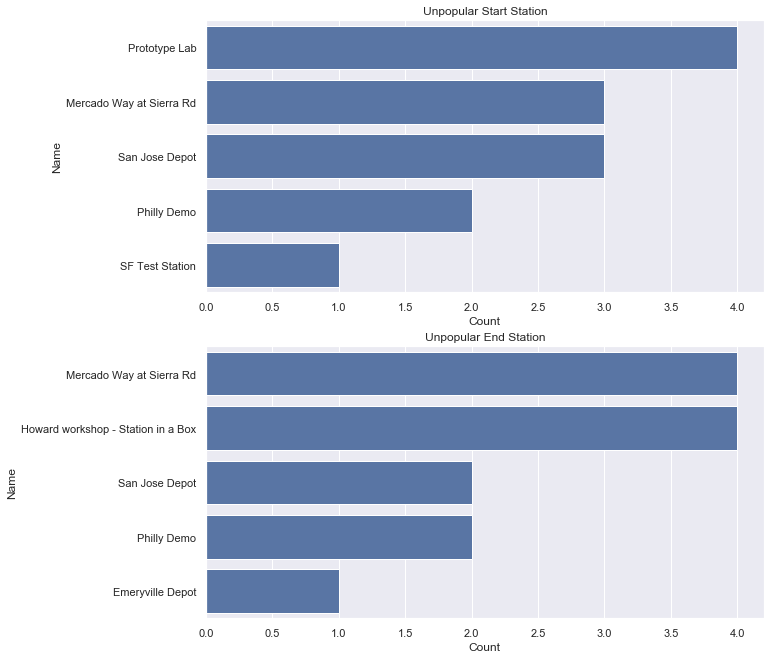

In [41]:
plt.figure(figsize=[10,11]);
plt.subplot(2,1,1)
sb.countplot(data = df_bike_copy ,y='start_station_name',order=df_bike_copy.start_station_name.value_counts().iloc[-5:].index
             ,color=base_color);
plt.title('Unpopular Start Station');
plt.ylabel('Name');
plt.xlabel('Count');

plt.subplot(2,1,2)
sb.countplot(data = df_bike_copy ,y='end_station_name',order=df_bike_copy.end_station_name.value_counts().iloc[-5:].index
             ,color=base_color);
plt.title('Unpopular End Station');
plt.ylabel('Name');
plt.xlabel('Count');